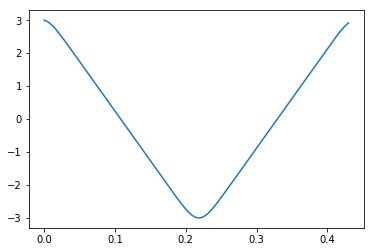

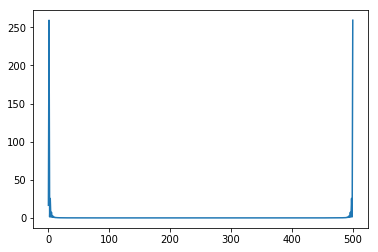

In [52]:
# DFTcomplex.py:  Discrete Fourier Transform with built in complex
from numpy import *
import matplotlib.pyplot as plt
import cmath                                            # complex math
    
########################################################################
#calculating the numerical solution to d2x/dx**2=-0.01x^11
#solution is stored in yp
a = 0.
b = 0.43
n = 500                                         
ydumb = zeros((2), float);    y = zeros((2), float)
fReturn = zeros((2), float);  k1 = zeros((2), float)
k2 = zeros((2), float);       k3 = zeros((2), float) 
k4 = zeros((2), float)
y[0] = 3.;   y[1] = -5.
t = a;       h = (b-a)/n;
xp=array([0.0])
yp=array([y[0]])

def f( t, y):                                           # Force function 
    fReturn[0] = y[1]                                           
    fReturn[1] = -0.01*y[0]**11     
    return fReturn

def rk4(t,h,n):                 
    k1 = [0]*(n)
    k2 = [0]*(n)
    k3 = [0]*(n)
    k4 = [0]*(n)
    fR = [0]*(n)
    ydumb = [0]*(n)
    fR = f(t, y)                                            # Returns RHS's  
    for i in range(0, n):
       k1[i] = h*fR[i]                             
    for i in range(0, n):
        ydumb[i] = y[i] + k1[i]/2. 
    k2 = h*f(t+h/2., ydumb) 
    for i in range(0, n):
        ydumb[i] = y[i] + k2[i]/2. 
    k3 = h*f(t+h/2., ydumb)
    for i in range(0, n):
        ydumb[i] = y[i] + k3[i] 
    k4 = h*f(t+h, ydumb) 
    for i in range(0, 2):
        y[i] = y[i] + (k1[i] + 2.*(k2[i] + k3[i]) + k4[i])/6.
    return y    

while (t < b):                                              # Time loop
    if ((t + h) > b):
        h = b - t                                           # Last step
    y = rk4(t,h,2)
    t = t + h
    xp=append(xp, t)
    yp=append(yp,y[0])
############################################################################
#Doing the Discrete Transform on the solution y(t)

    
    
N = 501;                  Np = N                           
signal = zeros( (N+1), float )     
twopi  = 2.*pi;       sq2pi = 1./sqrt(twopi);         h = twopi/N
dftz   = zeros( (Np), complex )                  # Complex elements
xa = zeros( (N+1), float )   
nplot = zeros( N, float )   
fplot = zeros( N, float ) 

        

def fourier(dftz):                                              # DFT
    for n in range(0, Np):              
      zsum = complex(0.0, 0.0)                
      for  k in range(0, N):                              
          zexpo = complex(0, twopi*k*n/N)           # Complex exponent
          zsum += yp[k]*exp(-zexpo)
      dftz[n] = zsum * sq2pi      
      nplot[n] = n
      fplot[n] = sqrt(dftz[n].imag*dftz[n].imag+dftz[n].real*dftz[n].real)

       
fourier(dftz)              # Call signal, transform
plt.plot(xp,yp)
plt.show()
plt.plot(nplot,fplot)
plt.show()


